In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np


In [10]:
# Fetch JSON data from the URL
url = "https://chisel.weirdgloop.org/gazproj/gazbot/rs_dump.json"
response = requests.get(url)
data = response.json()


In [18]:
filtered_data = {k: v for k, v in data.items() if isinstance(v, dict)}
df = pd.DataFrame.from_dict(filtered_data, orient='index')

In [24]:
df['price'] = pd.to_numeric(df['price'], errors='coerce').astype(float)
df['last'] = pd.to_numeric(df['last'], errors='coerce').astype(float)


In [36]:
df.dtypes

examine      object
id            int64
members        bool
lowalch     float64
limit         int64
value         int64
highalch    float64
icon         object
name         object
name_pt      object
price       float64
last        float64
dtype: object

In [25]:
df.head()

,examine,id,members,lowalch,limit,value,highalch,icon,name,name_pt,price,last
50109,One of Howl's original invention blueprints th...,50109,True,4000.0,2,10000,6000.0,'Ancient gizmos' blueprint.png,'Ancient gizmos' blueprint,Projeto de aparatos antigos,5515958.0,5515958.0
50112,One of Howl's original invention blueprints th...,50112,True,4000.0,2,10000,6000.0,'Ancient tools' blueprint.png,'Ancient tools' blueprint,Projeto de ferramentas antigas,5620756.0,5867714.0
52959,Reading this will unlock the &#x27;Diamond&#x2...,52959,False,NaN,2,1,NaN,'Diamond' title scroll.png,'Diamond' title scroll,"Pergaminho título ""Diamante""",544785.0,544785.0
53612,Reading this will unlock the &#x27;Emerald&#x2...,53612,False,NaN,2,1,NaN,'Emerald' title scroll.png,'Emerald' title scroll,"Pergaminho título ""Esmeralda""",284360.0,284360.0
53543,Reading this will unlock the &#x27;One of the ...,53543,False,NaN,2,1,NaN,'One of the Many' title scroll.png,'One of the Many' title scroll,"Título ""Um/a entre Muitos""",558473.0,558473.0


In [33]:
# User input for the item name
item_name = input("Enter the name of the item: ")

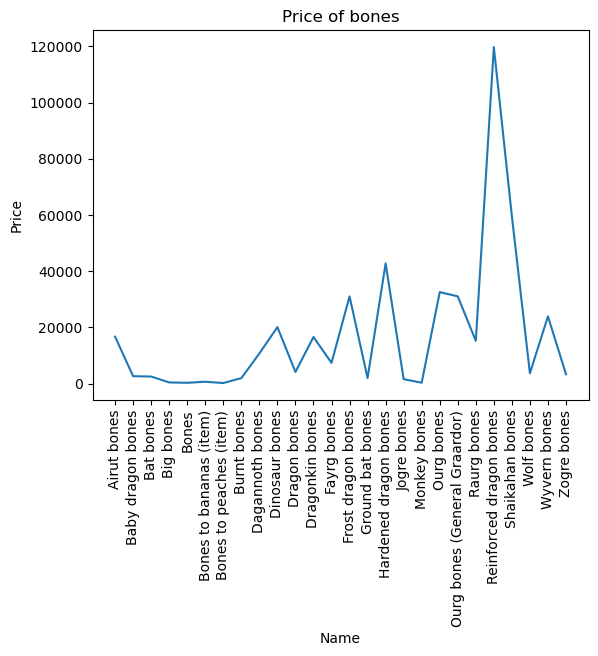

In [40]:
# Filter DataFrame based on user input
filtered_df = df[df['name'].str.lower().str.contains(item_name.lower())]

if filtered_df.empty:
    print("Item not found!")
else:
  
    # Plot the prices
    plt.plot(filtered_df['name'], filtered_df['price'])
    plt.xlabel('Name')
    plt.ylabel('Price')
    plt.title(f'Price of {item_name}')
    plt.xticks(rotation=90)
    plt.show()